In [4]:
import numpy as np , pandas as pd , seaborn as sns , matplotlib.pyplot as plt

## Logestic Regression

1- craete model.

2- fetch data.

3- model train, validation and optimization.

4- model test and scoring.

5- repeat steps 3 and 4 for the normalized data.




<h2>1 create model</h2>

In [1]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=0)

In [2]:
from sklearn import set_config

set_config(display="diagram")
display(log_model)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


<h2>2 fetch data</h2>

In [5]:
X_train_norm = pd.read_csv('../data/processed/X_train_norm.csv')
X_valid_norm = pd.read_csv('../data/processed/X_valid_norm.csv')
X_test_norm = pd.read_csv('../data/processed/X_test_norm.csv')

X_train = pd.read_csv('../data/processed/X_train.csv')
X_valid = pd.read_csv('../data/processed/X_valid.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

y_train = pd.read_csv('../data/processed/y_train.csv')
y_valid = pd.read_csv('../data/processed/y_valid.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')


<h2>3 model train, validation and optimization</h2>

In [6]:
log_model.fit(X_train,y_train)
score = log_model.score(X_valid,y_valid)
print(f'Model Score: {score}')

Model Score: 0.7642276422764228


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
param_grid_logistic_regression = {
    "penalty": ["l1" , "l2"],
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}


In [8]:
from sklearn.model_selection import GridSearchCV

grid_search_logistic_regression = GridSearchCV(
    log_model,
    param_grid= param_grid_logistic_regression,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1
)

In [9]:
grid_search_logistic_regression.fit(X_train,y_train)

valid_score_1 = grid_search_logistic_regression.score(X_valid , y_valid)

print("best score of train set: " + str(grid_search_logistic_regression.best_score_))
print("best parameter set: " + str(grid_search_logistic_regression.best_params_))
print("validation score: " + str(valid_score_1))



Fitting 5 folds for each of 60 candidates, totalling 300 fits


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn

best score of train set: 0.8063924050632911
best parameter set: {'C': np.float64(0.20433597178569415), 'penalty': 'l2', 'solver': 'liblinear'}
validation score: 0.7642276422764228


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn

In [10]:
y_pred_logistic = grid_search_logistic_regression.best_estimator_.predict(X_valid)

In [11]:
y_valid = np.array(y_valid["Loan_Status"])

In [12]:
from sklearn.metrics import precision_score , recall_score , f1_score

precision_log = precision_score(y_valid, y_pred_logistic , pos_label='Y')
recall_log = recall_score(y_valid , y_pred_logistic,pos_label='Y')

#f1_log
valid_score_2 = f1_score(y_valid , y_pred_logistic, pos_label='Y')


print(f'validation_precision_score: {precision_log:.3f}')
print(f'validation_recall score: {recall_log:.3f}')
print(f'validation_F-1 score: {valid_score_2:.3f}')

validation_precision_score: 0.769
validation_recall score: 0.941
validation_F-1 score: 0.847


In [13]:
progress = valid_score_2 - valid_score_1

print(f'model progress on validation data: {progress}')

model progress on validation data: 0.0823332042844237


<h3>select grid_search_logistic_regression as final model for test</h3>

In [14]:
y_pred_logistic = grid_search_logistic_regression.best_estimator_.predict(X_test)
y_test = np.array(y_test["Loan_Status"])

In [15]:

precision_log = precision_score(y_test, y_pred_logistic , pos_label='Y')
recall_log = recall_score(y_test , y_pred_logistic,pos_label='Y')

#f1_log
f1_log= f1_score(y_test , y_pred_logistic, pos_label='Y')


print(f'test_precision_score: {precision_log:.3f}')
print(f'test_recall score: {recall_log:.3f}')
print(f'test_F-1 score: {f1_log:.3f}')

test_precision_score: 0.829
test_recall score: 0.984
test_F-1 score: 0.900


In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix_logistic = confusion_matrix(y_test , y_pred_logistic)

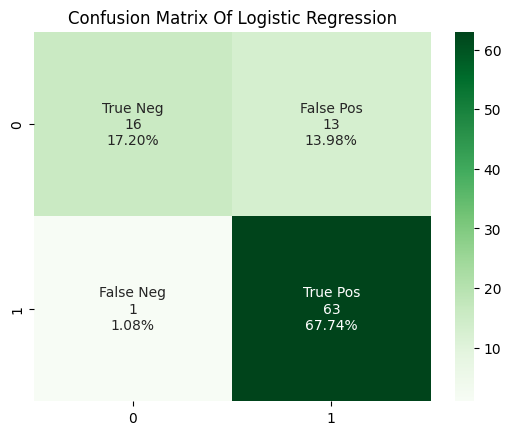

In [17]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_logistic.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_logistic.flatten() / np.sum(confusion_matrix_logistic)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
 
sns.heatmap(confusion_matrix_logistic, annot=labels, fmt="", cmap="Greens")
plt.title("Confusion Matrix Of Logistic Regression")
plt.savefig("../reports/figures/confusion_matrix_logistic_regression.png", dpi=300)

plt.show()


<h2>5- repeat steps 3 and 4 for the normalized data.</h2>

In [18]:
log_model.fit(X_train_norm,y_train)
score = log_model.score(X_valid_norm,y_valid)
print(f'Model Score norm: {score}')

Model Score norm: 0.7723577235772358


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# param_grid_logistic_regression = {
#     "penalty": ["l1" , "l2", "elasticnet" , None],
#     "C": np.logspace(-4,4,20),
#     "solver": ["liblinear" , "sega" , "lbfgs" , "newton-cg" , "sag"],
#     "max_iter" :[100,200,500]
# }

In [20]:

grid_search_logistic_regression = GridSearchCV(
    log_model,
    param_grid= param_grid_logistic_regression,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1
)

In [21]:
grid_search_logistic_regression.fit(X_train_norm,y_train)

valid_score_1 = grid_search_logistic_regression.score(X_valid_norm , y_valid)

print("best score of train set norm: " + str(grid_search_logistic_regression.best_score_))
print("best parameter set norm: " + str(grid_search_logistic_regression.best_params_))
print("validation score norm: " + str(valid_score_1))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn

best score of train set norm: 0.8089556962025316
best parameter set norm: {'C': np.float64(0.01610262027560939), 'penalty': 'l1', 'solver': 'liblinear'}
validation score norm: 0.7804878048780488


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn

In [22]:
y_pred_logistic = grid_search_logistic_regression.best_estimator_.predict(X_valid_norm)


In [23]:

precision_log = precision_score(y_valid, y_pred_logistic , pos_label='Y')
recall_log = recall_score(y_valid , y_pred_logistic,pos_label='Y')

#f1_log
valid_score_2 = f1_score(y_valid , y_pred_logistic, pos_label='Y')


print(f'validation_precision_score norm: {precision_log:.3f}')
print(f'validation_recall score norm: {recall_log:.3f}')
print(f'validation_F-1 score norm: {valid_score_2:.3f}')

validation_precision_score norm: 0.774
validation_recall score norm: 0.965
validation_F-1 score norm: 0.859


In [24]:
progress = valid_score_2 - valid_score_1

print(f'model progress on validation normalized data: {progress}')

model progress on validation normalized data: 0.07815093857744859


In [25]:
y_pred_logistic = grid_search_logistic_regression.best_estimator_.predict(X_test_norm)


In [26]:

precision_log = precision_score(y_test, y_pred_logistic , pos_label='Y')
recall_log = recall_score(y_test , y_pred_logistic,pos_label='Y')

#f1_log
f1_log= f1_score(y_test , y_pred_logistic, pos_label='Y')


print(f'test_precision_score norm: {precision_log:.3f}')
print(f'test_recall score norm: {recall_log:.3f}')
print(f'test_F-1 score norm: {f1_log:.3f}')

test_precision_score norm: 0.829
test_recall score norm: 0.984
test_F-1 score norm: 0.900


In [27]:

confusion_matrix_logistic = confusion_matrix(y_test , y_pred_logistic)

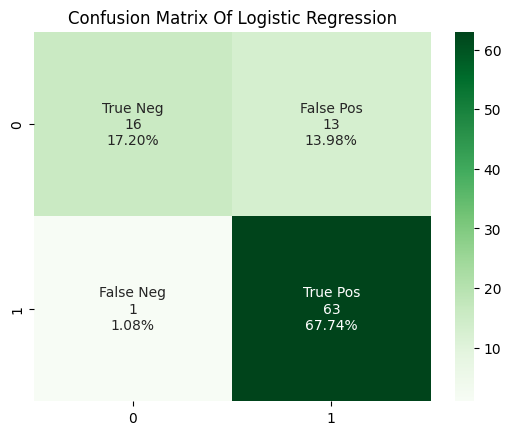

In [80]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_logistic.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_logistic.flatten() / np.sum(confusion_matrix_logistic)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
 
sns.heatmap(confusion_matrix_logistic, annot=labels, fmt="", cmap="Greens")
plt.title("Confusion Matrix Of Logistic Regression")
plt.savefig("../reports/figures/confusion_matrix_logistic_regression_normalized_data.png", dpi=300)

plt.show()

In [28]:
import joblib

joblib.dump(
    grid_search_logistic_regression.best_estimator_,
    "../models/grid_search_logistic_regression.joblib"
)

['../models/grid_search_logistic_regression.joblib']

########